# Modelo de Lotka-Volterra
## Ecuaciones diferenciales

$$
\begin{align}
&\frac{dx}{dt} = x (\alpha - \beta y)&\\

&\frac{dy}{dt} = -y (\gamma - \delta x)&
\end{align}
$$

(array([-0.,  0.,  2.]), array([0., 0., 0.]), array([0., 0., 0.]))


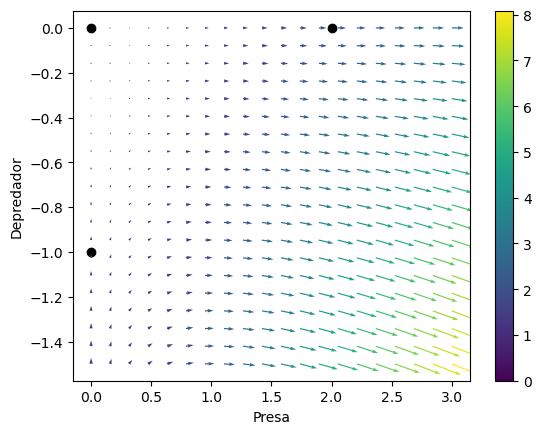

In [47]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import scipy.optimize as op


# Sistema de ecuaciones diferenciales 
def equations(vars):
   # Parámetros del sistema
   alpha = 1
   beta = 1
   gamma = 1
   delta = 1
   epsilon = 1
   zeta = 1
   a = 10
   b = 1
   x, y, z = vars
   fx = alpha * x - beta * x * y - gamma * x * z
   fy = beta * x * y - delta * y - zeta * z * y
   fz = gamma * x * z - epsilon * z - zeta * y * z

   return fx, fy, fz

# Buscamos los estados estacionarios
x_i = np.linspace(-10, 10, 100)
y_i = np.linspace(-10, 10, 100)
z_i = np.linspace(-10, 10, 100)
initial_guesses = np.stack((x_i, y_i, z_i), axis=1)

stat = [[], [], []]

for guess in initial_guesses:
   result = op.root(fun=equations, x0=guess)
   if result.success:
      roots = np.round(result.x, 2)
      stat = np.column_stack((stat, roots))

x_0, y_0, z_0 = np.unique(np.round(stat), axis=1)



plt.scatter(x_0, y_0, marker='o', c='k' )

x_max = x_0.max()
y_max = y_0.max()
z_max = z_0.max()

x_min = np.abs(x_0.min())
y_min = np.abs(y_0.min())
z_min = np.abs(z_0.min())

# Rango de las variables
x = np.linspace(-1.5 * x_min, 1.5 * x_max, 20)
y = np.linspace(-1.5 * y_min, 1.5 * y_max, 20)
z = np.linspace(-1.5 * z_min, 1.5 * z_max, 20)

# Creamos el grid con las posiciones
x_grid, y_grid, z_grid = np.meshgrid(x, y, z)

print(equations([x_0, y_0, z_0]))

fx, fy, fz = equations([x_grid, y_grid, z_grid])
magnitude = np.sqrt(fx ** 2 + fy ** 2 + fz ** 2)

# Graficamos el campo vectorial
plt.quiver(x, y, fx[:, :, -1], fy[:, :, -1], magnitude[:, :, -1] , cmap='viridis', norm='linear')
plt.colorbar()
plt.xlabel('Presa')
plt.ylabel('Depredador')

plt.show()